In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [ ]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.cifar10.load_data()
print("Dataset_loaded")
print("Training data shape:",X_train.shape)
print("Testing data shape:",X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Dataset_loaded
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


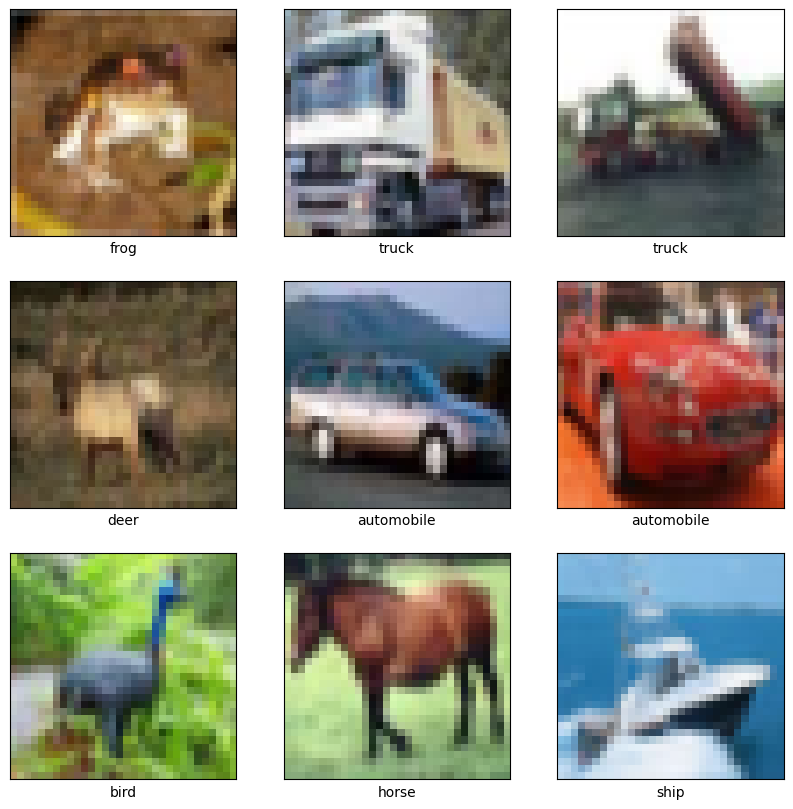

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))


for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[Y_train[i][0]])

plt.show()


In [ ]:
## Normalization
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
print("Normalization done!")
print("Minimum Pixel Label:",X_train.min())
print("Maximum Pixel Label:",X_train.max())

Normalization done!
Minimum Pixel Label: 0.0
Maximum Pixel Label: 1.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.3427 - loss: 1.7720 - val_accuracy: 0.5560 - val_loss: 1.2553
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.5683 - loss: 1.2170 - val_accuracy: 0.6114 - val_loss: 1.1106
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.6343 - loss: 1.0416 - val_accuracy: 0.6479 - val_loss: 1.0139
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6742 - loss: 0.9235 - val_accuracy: 0.6754 - val_loss: 0.9471
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.7126 - loss: 0.8299 - val_accuracy: 0.6613 - val_loss: 1.0134
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.7387 - loss: 0.7584 - val_accuracy: 0.7029 - val_loss: 0.8686
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.7559 - loss: 0.7000 - val_accuracy: 0.7043 - val_loss: 0.8696
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.7727 -

In [ ]:
test_loss,test_accuracy=model.evaluate(X_test,Y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy:{test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7016 - loss: 1.5689
Test Loss: 1.601414680480957
Test Accuracy:0.7019000053405762


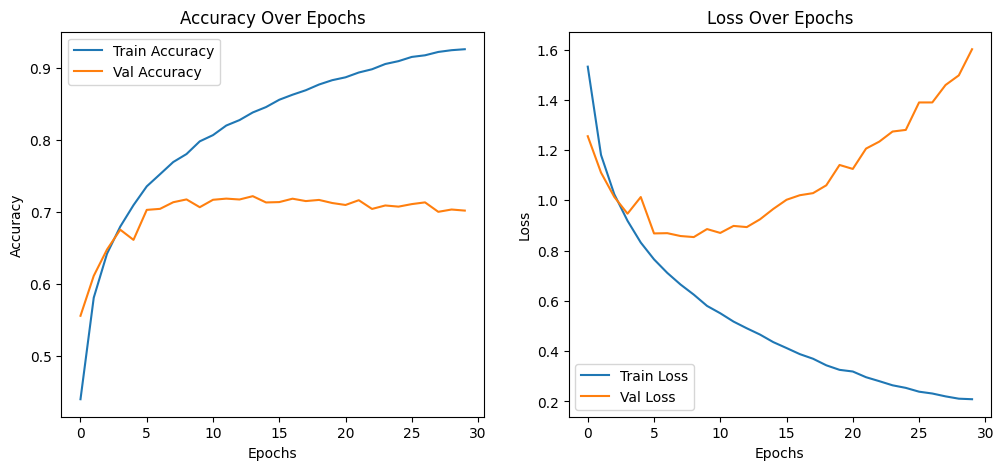

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


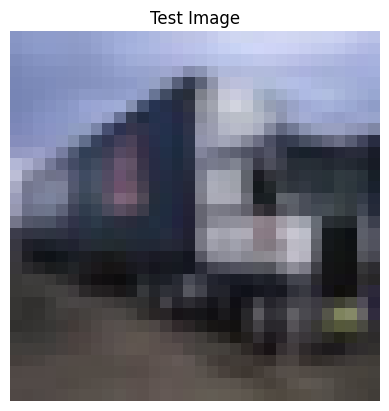

Actual Label   : truck
Predicted Label: truck


In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

img = X_test[34]
true_label = class_names[Y_test[34][0]]

plt.imshow(img)
plt.axis('off')
plt.title("Test Image")
plt.show()

prediction=model.predict(img.reshape(1,32,32,3),verbose=0)
predicted_label=class_names[prediction.argmax()]
print("Actual Label   :", true_label)
print("Predicted Label:", predicted_label)


In [ ]:
model.save("cifar10_cnn_model.keras")

print("Model saved successfully!")


Model saved successfully!


In [ ]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.3 MB/s eta 0:00:00


In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

st.title("CIFAR-10 Image Classification App")
st.write("Upload an image and the model will predict the class")

model=tf.keras.models.load_model("cifar10_cnn_model.keras")
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png"])


if uploaded_file is not None:
  image=Image.open(uploaded_file).resize((32, 32))
  st.image(image, caption='Uploaded Image', use_column_width=True)
  img_array = np.array(image) / 255.0
  img_array = img_array.reshape(1, 32, 32, 3)
  prediction = model.predict(img_array)
  predicted_label = class_names[np.argmax(prediction)]

  st.write("### Predicted Label:", predicted_label)



Overwriting streamlit_app.py


In [ ]:
!pip install pyngrok


In [ ]:
import os
os.environ['NGROK_TOKEN'] = input("Enter your ngrok token (hidden): ")


Enter your ngrok token (hidden): 36dctLwJ2xykhom6yF03tJ3n3nc_6cZJ7HBN5sMTfPEEKXM1N


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token(os.environ['NGROK_TOKEN'])
ngrok.kill()
public_url = ngrok.connect(8501)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://tanja-unestablishable-cecille.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
!streamlit run streamlit_app.py --server.port=8501 --server.address=0.0.0.0





  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501

2025-12-10 05:06:47.029377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765343207.059690   13940 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765343207.068665   13940 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765343207.095809   13940 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765343207.095863   13940 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.


In [ ]:
from pyngrok import ngrok
ngrok.kill()

print("All tunnels closed.")


All tunnels closed.
